### Principal Component Analysis from Scratch

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Reading the dataset

In [2]:
data = pd.read_csv("iris.csv")
data.drop('Id',axis = 1, inplace = True)
data = data.sample(frac=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
110,6.5,3.2,5.1,2.0,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
15,5.7,4.4,1.5,0.4,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica
13,4.3,3.0,1.1,0.1,Iris-setosa
...,...,...,...,...,...
126,6.2,2.8,4.8,1.8,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica


In [3]:
Features = data.drop("Species",axis=1).reset_index()
Features

,index,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,110,6.5,3.2,5.1,2.0
1,58,6.6,2.9,4.6,1.3
2,15,5.7,4.4,1.5,0.4
3,142,5.8,2.7,5.1,1.9
4,13,4.3,3.0,1.1,0.1
...,...,...,...,...,...
145,126,6.2,2.8,4.8,1.8
146,50,7.0,3.2,4.7,1.4
147,75,6.6,3.0,4.4,1.4
148,120,6.9,3.2,5.7,2.3


In [4]:
Features_scaled = StandardScaler().fit_transform(Features)
Features_scaled

array([[ 8.19855601e-01,  7.95669016e-01,  3.37848329e-01,
         7.62758643e-01,  1.05353673e+00],
       [-3.81059646e-01,  9.16836886e-01, -3.56360566e-01,
         4.78430123e-01,  1.33225943e-01],
       [-1.37412418e+00, -1.73673948e-01,  3.11468391e+00,
        -1.28440670e+00, -1.05003079e+00],
       [ 1.55888037e+00, -5.25060772e-02, -8.19166497e-01,
         7.62758643e-01,  9.22063763e-01],
       [-1.42031323e+00, -1.87002413e+00, -1.24957601e-01,
        -1.51186952e+00, -1.44444970e+00],
       [-7.04382982e-01, -9.00681170e-01,  1.72626612e+00,
        -1.05694388e+00, -1.05003079e+00],
       [-6.81288458e-01, -1.26418478e+00, -1.24957601e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00],
       [ 1.02770632e+00,  1.89829664e-01, -1.97618132e+00,
         7.05892939e-01,  3.96171883e-01],
       [-9.58422745e-01, -4.16009689e-01,  2.65187798e+00,
        -1.34127240e+00

In [5]:
target = data['Species']
target

110     Iris-virginica
58     Iris-versicolor
15         Iris-setosa
142     Iris-virginica
13         Iris-setosa
            ...       
126     Iris-virginica
50     Iris-versicolor
75     Iris-versicolor
120     Iris-virginica
97     Iris-versicolor
Name: Species, Length: 150, dtype: object

### Covariance Matrix

In [6]:
cov = np.cov(Features_scaled.T)
cov

array([[ 1.00671141,  0.72148618, -0.40039813,  0.8886718 ,  0.90579723],
       [ 0.72148618,  1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.40039813, -0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.8886718 ,  0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.90579723,  0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### Eigen Value Decomposition

In [7]:
values, vectors = np.linalg.eig(cov)
print("Values[:10] : ",values[:10])
print("Vectors[:10] : ",vectors[:10])

Values[:10] :  [3.7603354  0.92794917 0.23570257 0.08883057 0.02073933]
Vectors[:10] :  [[-0.48136016 -0.02275157 -0.67406853  0.55978662 -0.0067323 ]
 [-0.44844975  0.38285827  0.64520569  0.40999945  0.26061932]
 [ 0.23195044  0.92007839 -0.27427786 -0.09491665 -0.12416613]
 [-0.51079205  0.03074857  0.13238322 -0.28817343 -0.79848404]
 [-0.5024696   0.07356757 -0.19127876 -0.65305918  0.52824072]]


### Normalization of Eigen Values

In [8]:
explained_variance = []
sum_eigen = np.sum(values)
for i in range(len(values)):
    explained_variance.append(values[i]/sum_eigen)
explained_variance

[0.7470533000277259,
 0.18435256887931994,
 0.04682624420508826,
 0.017647673742565078,
 0.0041202131453008835]

### Plotting the Normed Eigen Values

<BarContainer object of 5 artists>

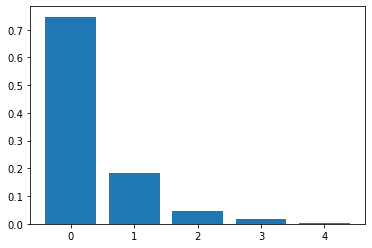

In [9]:
plt.bar(range(len(explained_variance)),explained_variance)

### Cumulative Variance

In [10]:
cumulative_variance = []

cumulative_variance.append(explained_variance[0])
for i in range(len(explained_variance)):
    if i == 0:
        continue
    cumulative_variance.append(explained_variance[i]+cumulative_variance[i-1])

cumulative_variance

[0.7470533000277259,
 0.9314058689070458,
 0.9782321131121341,
 0.9958797868546991,
 1.0]

<BarContainer object of 5 artists>

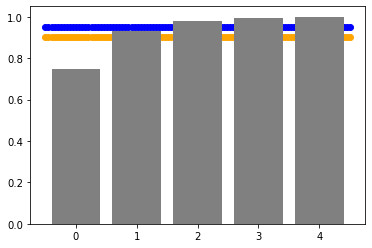

In [11]:
plt.scatter(np.linspace(-0.5,4.5,100),np.ones_like(np.linspace(-0.5,4.5,100))*0.9,color="orange")
plt.scatter(np.linspace(-0.5,4.5,100),np.ones_like(np.linspace(-0.5,4.5,100))*0.95,color="blue")
plt.bar(range(len(cumulative_variance)),cumulative_variance, color="grey")


### Projection to Eigen Spaces

In [12]:
PC1 = Features_scaled@vectors.T[0]
PC2 = Features_scaled@vectors.T[1]
PC3 = Features_scaled@vectors.T[2]

PCA_data = pd.DataFrame(PC1, columns=['PC1'])
PCA_data['PC2'] = PC2
PCA_data['PC3'] = PC3
PCA_data['Species'] = target
PCA_data

,PC1,PC2,PC3,Species
0,-1.592081,0.697782,-0.232476,Iris-setosa
1,-0.621707,0.056321,0.984003,Iris-setosa
2,2.645458,2.713782,-0.009276,Iris-setosa
3,-1.769763,-0.717979,-0.935385,Iris-setosa
4,2.991353,-0.951363,-0.138742,Iris-setosa
...,...,...,...,...
145,-1.602370,-0.326020,-0.434500,Iris-virginica
146,-0.684209,0.896232,1.213228,Iris-virginica
147,-0.764986,0.266472,0.615687,Iris-virginica
148,-2.293062,0.917596,-0.105711,Iris-virginica


### Plotting data on eigen spaces with projection

<AxesSubplot:title={'center':'Species on Principal Component 1'}, xlabel='PC1'>

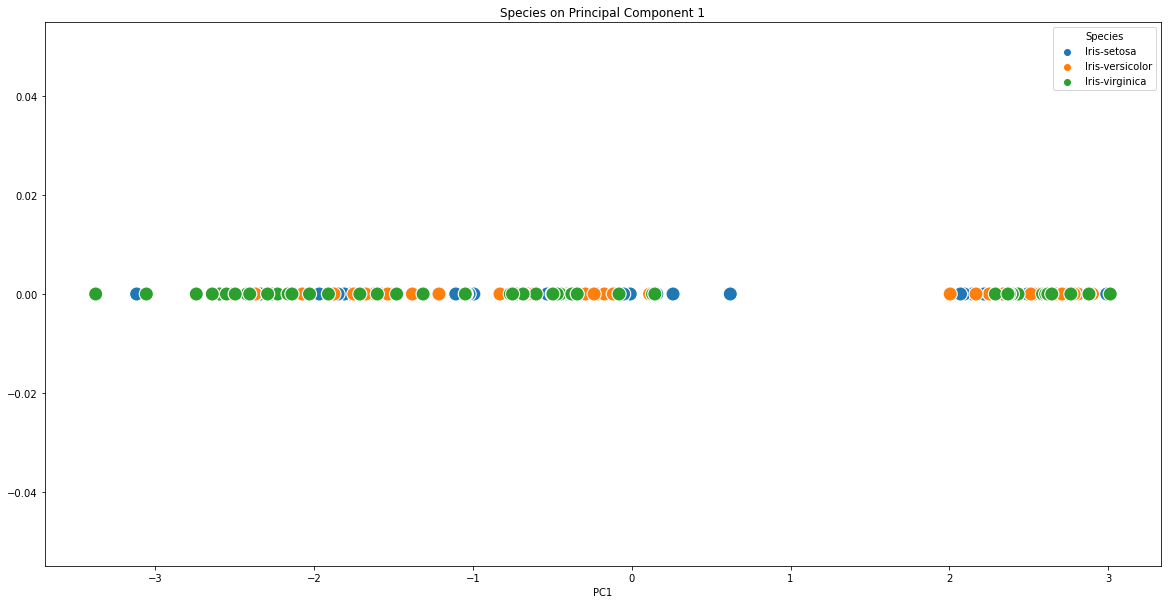

In [13]:
plt.figure(figsize=(20, 10))
plt.title("Species on Principal Component 1")
sns.scatterplot(x=PCA_data['PC1'], y=[0] * len(PCA_data), hue=PCA_data['Species'], s=200)

<AxesSubplot:title={'center':'Species on Principal Component 2'}, xlabel='PC2'>

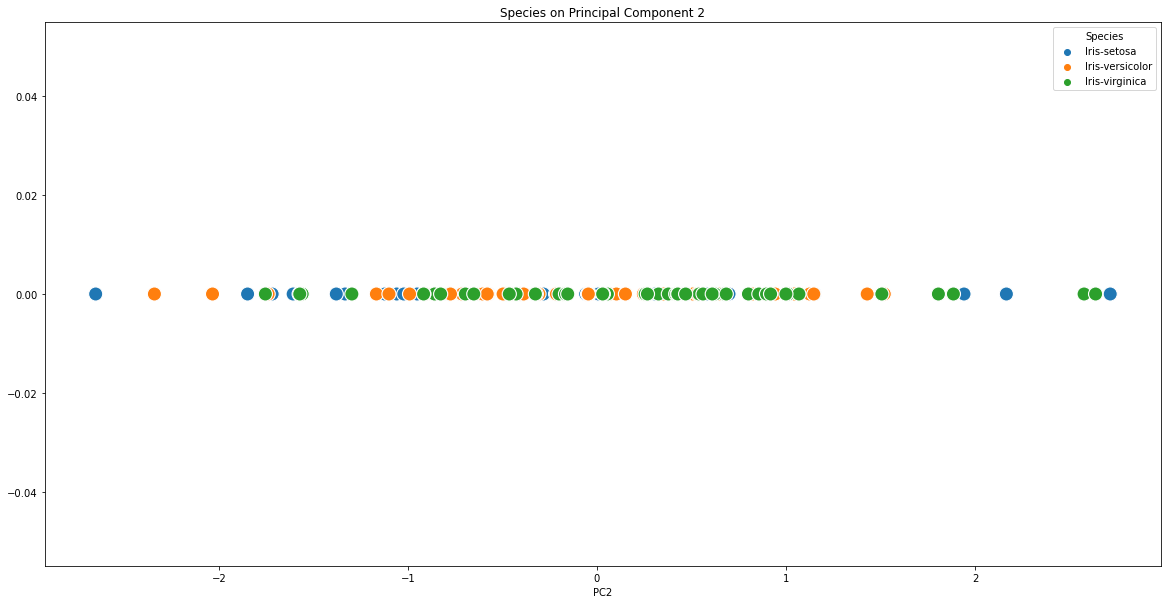

In [14]:
plt.figure(figsize=(20, 10))
plt.title("Species on Principal Component 2")
sns.scatterplot(x=PCA_data['PC2'], y=[0] * len(PCA_data), hue=PCA_data['Species'], s=200)

<AxesSubplot:title={'center':'Species on Principal Component 3'}, xlabel='PC2'>

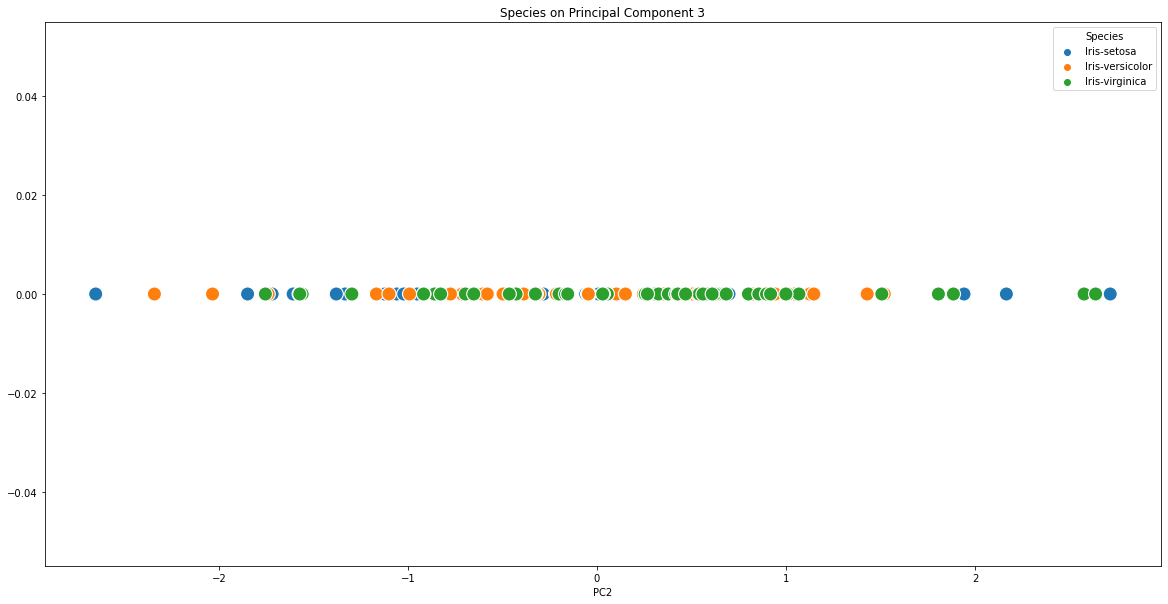

In [15]:
plt.figure(figsize=(20, 10))
plt.title("Species on Principal Component 3")
sns.scatterplot(x=PCA_data['PC2'], y=[0] * len(PCA_data), hue=PCA_data['Species'], s=200)

### Observation : It is visible that except PC1 other axis does not provide great discriminative features

<AxesSubplot:title={'center':'Scatter over PC1 and PC2'}, xlabel='PC1', ylabel='PC2'>

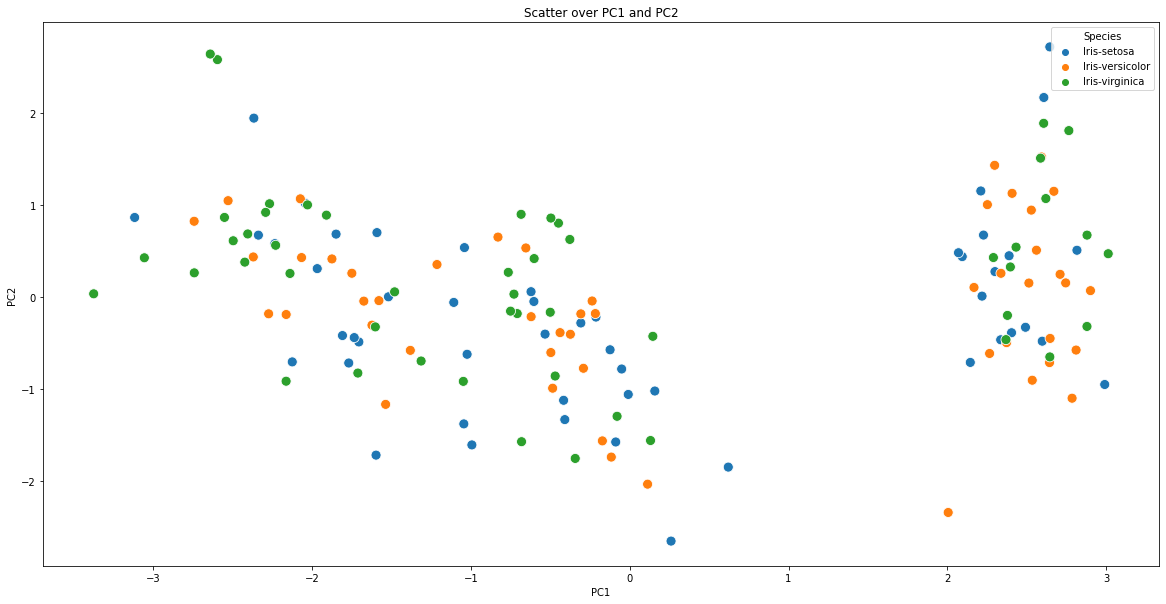

In [16]:
plt.figure(figsize=(20, 10))
plt.title("Scatter over PC1 and PC2")
sns.scatterplot(x=PCA_data['PC1'], y=PCA_data['PC2'], hue=PCA_data['Species'], s=100)

### Projection on 3d space with first 3 Principal Component

Text(0.5, 0, 'PC3')

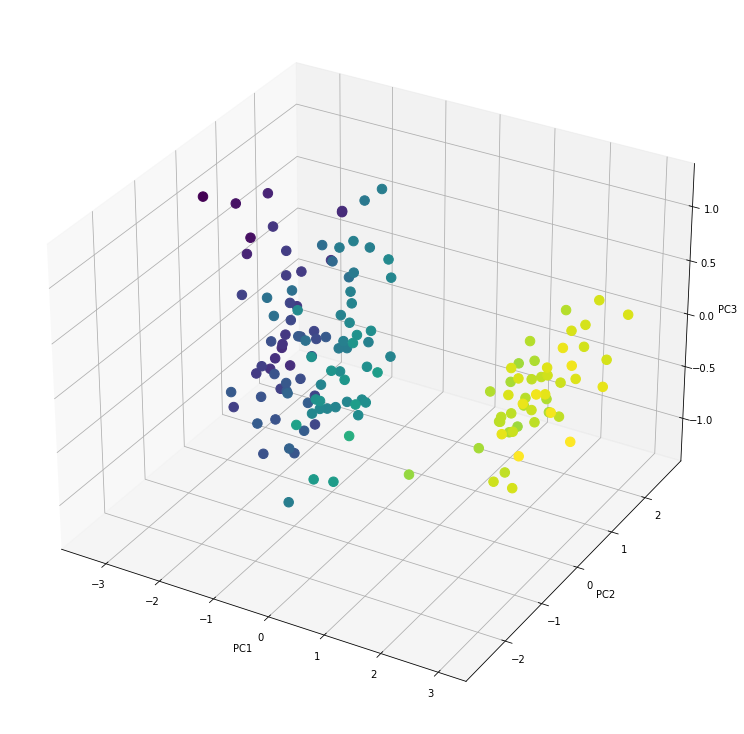

In [20]:
fig = plt.figure(figsize=(20,10))

ax = Axes3D(fig)


g = ax.scatter(PCA_data['PC1'], PCA_data['PC2'], PCA_data['PC3'], c=PCA_data['PC1'], marker='o', depthshade=False, s=90)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

### Thank you